In [1]:
library(Seurat)
library(SeuratData)
library(cowplot)
library(patchwork)
library(MAST)
library(BASiCS)

Attaching SeuratObject

Registered S3 method overwritten by 'cli':
  method     from         
  print.boxx spatstat.geom

Warning message in if (is.na(desc)) {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (is.na(desc)) {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (is.na(desc)) {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (is.na(desc)) {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (is.na(desc)) {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (is.na(desc)) {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (is.na(desc)) {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (is.na(desc)) {:
“the condition has length > 1 and only the first element will be used

In [2]:
# Get Interferon data 
install.packages("https://seurat.nygenome.org/src/contrib/ifnb.SeuratData_3.0.0.tar.gz", repos = NULL, type = "source")

In [3]:
library(ifnb.SeuratData)
data("ifnb")

In [4]:
table(ifnb[['seurat_annotations']])


   CD14 Mono  CD4 Naive T CD4 Memory T    CD16 Mono            B        CD8 T 
        4362         2504         1762         1044          978          814 
 T activated           NK           DC  B Activated           Mk          pDC 
         633          619          472          388          236          132 
       Eryth 
          55 

In [5]:
ifnb_mono <- ifnb[,ifnb[['seurat_annotations']] == 'CD14 Mono']

In [6]:
ifnb_mono <- NormalizeData(ifnb_mono, normalization.method = 'LogNormalize', scale.factor = 10000)

In [7]:
ifnb_mono

An object of class Seurat 
14053 features across 4362 samples within 1 assay 
Active assay: RNA (14053 features, 0 variable features)

In [8]:
table(Idents(ifnb_mono))


IMMUNE_CTRL IMMUNE_STIM 
       2215        2147 

In [9]:
mono_ctrl_downsample <- subset(x = ifnb_mono, idents = 'IMMUNE_CTRL', downsample = 1000)

In [10]:
mono_ctrl_downsample

An object of class Seurat 
14053 features across 1000 samples within 1 assay 
Active assay: RNA (14053 features, 0 variable features)

In [11]:
FetchData(object = mono_ctrl_downsample, vars = c('ISG15','MX1','OASL','OAS1','MX2'))

,ISG15,MX1,OASL,OAS1,MX2
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
AAACATTGCTTCGC.1,0.000000,0.000000,0.000000,0.000000,0.000000
AAACGCTGGGGATG.1,0.000000,0.000000,0.000000,0.000000,0.000000
AAAGACGAGTAAGA.1,0.000000,0.000000,0.000000,0.000000,0.000000
AAAGATCTACCCTC.1,3.689748,2.454950,0.000000,2.454950,1.514823
AAAGCAGAGTTTCT.1,2.033989,0.000000,0.000000,0.000000,0.000000
AAAGGCCTAGTCTG.1,2.082247,0.000000,0.000000,0.000000,0.000000
AAAGTTTGTGTGGT.1,0.000000,0.000000,0.000000,0.000000,0.000000
AAAGTTTGTTCGTT.1,0.000000,0.000000,0.000000,0.000000,0.000000
AAATACTGGTTCTT.1,0.000000,0.000000,0.000000,0.000000,0.000000


In [12]:
mono_stim_downsample <- subset(x = ifnb_mono, idents = 'IMMUNE_STIM', downsample = 1000)

In [13]:
mono_stim_downsample

An object of class Seurat 
14053 features across 1000 samples within 1 assay 
Active assay: RNA (14053 features, 0 variable features)

In [137]:
# BASicS

In [14]:
rna_ctrl <- FetchData(object = mono_ctrl_downsample, vars = c('ISG15','MX1','OASL','OAS1','MX2'))
rna_ctrl <- as.matrix(rna_ctrl)

In [15]:
dim(rna_ctrl)

[1] 1000    5

In [16]:
rna_ctrl <- rna_ctrl[rowSums(rna_ctrl) >0,]

In [17]:
ctrl_no_zero <- mono_ctrl_downsample[,rownames(rna_ctrl)]

In [18]:
rownames(rna_ctrl)

[1] "AAAGATCTACCCTC.1" "AAAGCAGAGTTTCT.1" "AAAGGCCTAGTCTG.1"
  [4] "AAATCCCTAAGAAC.1" "AAATCCCTGTTGAC.1" "AAATGGGAGGGAGT.1"
  [7] "AAATGTTGAGCTCA.1" "AAATTGACAAACAG.1" "AACAGCACGTCGAT.1"
 [10] "AACGCATGACCTAG.1" "AACGCATGGCCATA.1" "AACGCATGTAGAAG.1"
 [13] "AACGTGTGTATTCC.1" "AAGAACGATACGCA.1" "AAGCAAGATCACCC.1"
 [16] "AAGCACTGAGGTCT.1" "AAGCGACTCTGGAT.1" "AAGCGACTTGCTAG.1"
 [19] "AAGTAACTATCAGC.1" "AAGTCCGACTCAAG.1" "AAGTGGCTCCAGTA.1"
 [22] "AAGTTATGCAGAAA.1" "AAGTTATGCTAAGC.1" "AATACTGATCGCTC.1"
 [25] "AATAGGGAGGGAGT.1" "AATATCGAGAGGCA.1" "AATCCGGATTGCTT.1"
 [28] "AATCCTTGGTGTTG.1" "AATGTAACTGCATG.1" "AATGTTGAAAACAG.1"
 [31] "AATTACGATTGCTT.1" "AATTCCTGCCACCT.1" "ACAAAGGAAGATCC.1"
 [34] "ACAAGAGAAAACGA.1" "ACACCAGAGTCATG.1" "ACACGATGGGCATT.1"
 [37] "ACACGATGTCCCAC.1" "ACATACCTGTGCTA.1" "ACCCACTGCGGTAT.1"
 [40] "ACCGAAACAGCGTT.1" "ACCGAAACGTCCTC.1" "ACCGCGGACACTTT.1"
 [43] "ACCTCCGAATCTTC.1" "ACCTGGCTACGTGT.1" "ACCTGGCTATCGTG.1"
 [46] "ACGAACTGACCTCC.1" "ACGAAGCTTTCGTT.1" "ACGATCGATGAGGG.1"
 [49] "ACGATGACGGATCT.1" "ACGCCACTTTCGGA.1" "ACGCTCACTCTTTG.1"
 [52] "ACGCTGCTGCTGTA.1" "ACGGAACTTCCCAC.1" "ACGGCTCTGTATGC.1"
 [55] "ACGGGAGACCAGTA.1" "ACGTTACTGCTTAG.1" "ACTACGGACTCATT.1"
 [58] "ACTACGGAGAATGA.1" "ACTAGGTGCCGTTC.1" "ACTCTCCTGCGAGA.1"
 [61] "ACTGCCACTGTGCA.1" "ACTGGCCTATGTCG.1" "ACTGGCCTGCTGTA.1"
 [64] "ACTGTGGAAACCAC.1" "ACTGTTACGACAGG.1" "ACTTCAACACGCAT.1"
 [67] "ACTTCCCTAGTCTG.1" "ACTTGGGAGCCAAT.1" "AGAAAGTGCCGATA.1"
 [70] "AGAACAGAGCTGTA.1" "AGAAGATGAAGAGT.1" "AGAAGATGACACAC.1"
 [73] "AGAAGATGCTGCAA.1" "AGACACTGAGCACT.1" "AGACTGACGGCATT.1"
 [76] "AGAGATGAGCGTAT.1" "AGAGATGATGGATC.1" "AGAGCTACATCACG.1"
 [79] "AGAGGTCTAAACGA.1" "AGATATTGTGTTTC.1" "AGATTCCTAGCGTT.1"
 [82] "AGATTCCTTCCAGA.1" "AGCACAACGACGAG.1" "AGCACAACTTCGTT.1"
 [85] "AGCATGACGCAGTT.1" "AGCCAATGAAACAG.1" "AGCCGGTGGGGATG.1"
 [88] "AGCCGGTGTTCCAT.1" "AGCGCTCTCCTTTA.1" "AGCTGAACTAAAGG.1"
 [91] "AGCTTTACAGAATG.1" "AGGGAGTGTGACCA.1" "AGGGCGCTACGGGA.1"
 [94] "AGGGCGCTCTATGG.1" "AGGTCATGGTTTCT.1" "AGGTCTGAGTTGTG.1"
 [97] "AGGTGTTGGAGGTG.1" "AGTAATACTGAAGA.1" "AGTACGTGCCATAG.1"
[100] "AGTACGTGTGAGCT.1" "AGTACGTGTTCCAT.1" "AGTACTCTCACTAG.1"
[103] "AGTAGAGATGAAGA.1" "AGTAGGCTAGGCGA.1" "AGTAGGCTATTGGC.1"
[106] "AGTGACTGCGTGTA.1" "AGTGACTGGAGCAG.1" "AGTTTAGATAAGCC.1"
[109] "AGTTTCACTCACCC.1" "AGTTTGCTTCTTCA.1" "ATAAACACACGTGT.1"
[112] "ATAACCCTACCTCC.1" "ATAACCCTTGACTG.1" "ATAATGACTTATCC.1"
[115] "ATACAATGTCAGAC.1" "ATACCTTGTTCTGT.1" "ATACTCTGCTTAGG.1"
[118] "ATAGAACTGTCCTC.1" "ATAGCTCTCATGGT.1" "ATAGGAGATGAAGA.1"
[121] "ATAGTCCTGGTGTT.1" "ATAGTTGATTGGTG.1" "ATCATCTGTTCTGT.1"
[124] "ATCGACGATAAGGA.1" "ATCGCCACACGGTT.1" "ATCGCGCTGTGCTA.1"
[127] "ATCGGTGACTACGA.1" "ATCGTTTGTATGGC.1" "ATCTACTGATTTCC.1"
[130] "ATCTACTGTTTCAC.1" "ATGAAACTGCTGTA.1" "ATGAAACTTCCTGC.1"
[133] "ATGACGTGCATTTC.1" "ATGAGAGAAGCGGA.1" "ATGATATGCGCTAA.1"
[136] "ATGCAGACTGGATC.1" "ATTAACGAGACACT.1" "ATTAGATGCACTGA.1"
[139] "ATTAGTGACATTCT.1" "ATTGAATGACGGGA.1" "ATTGCGGATGTCTT.1"
[142] "ATTGCTACACTGTG.1" "ATTGTCTGGAATAG.1" "ATTTCTCTCTACTT.1"
[145] "CAAACTCTTTACCT.1" "CAAAGCTGCATTGG.1" "CAAATTGACATTCT.1"
[148] "CAACAGACCGCATA.1" "CAAGAAGATCCTGC.1" "CAAGCATGAAGCCT.1"
[151] "CAAGCATGGGTAAA.1" "CAAGGACTTTGCGA.1" "CAATGGACTCTTAC.1"
[154] "CACCACTGTAGAGA.1" "CACCTGACGGGCAA.1" "CACTCTCTAGCTAC.1"
[157] "CACTGCACACAGCT.1" "CACTTATGCCCAAA.1" "CAGACAACCGTACA.1"
[160] "CAGACATGCATTGG.1" "CAGCTAGACCGAAT.1" "CAGGAACTCCACAA.1"
[163] "CAGGTATGCTTCGC.1" "CAGGTTGAGAGAGC.1" "CAGTGTGATTCGGA.1"
[166] "CAGTTGGACGGGAA.1" "CAGTTTACTATCTC.1" "CATAAAACACCCTC.1"
[169] "CATAGTCTACACTG.1" "CATAGTCTTAGCCA.1" "CATATAGATCTTTG.1"
[172] "CATCAGGATGCTGA.1" "CATCGGCTATGTGC.1" "CATCTCCTTTGGCA.1"
[175] "CATGAGACAGGTCT.1" "CATGTTTGTGTGGT.1" "CATTCCCTAAGTAG.1"
[178] "CATTGTTGTGTCCC.1" "CCAAGATGCGACAT.1" "CCAATGGATGCATG.1"
[181] "CCAATTTGTGGAAA.1" "CCACTGTGGCTAAC.1" "CCAGCGGATTTACC.1"
[184] "CCATGCTGCTAAGC.1" "CCCAACACAGTAGA.1" "CCCATGTGACGTTG.1"
[187] "CCCGATTGAAGAGT.1" "CCCGGAGACAACCA.1" "CCCGGAGAGGGAGT.1"
[190] "CCGGAGTGCCGTAA.1" "CCGTAAG

In [27]:
# Creatine SingleCellExperiment object 
sce_ctrl <- SingleCellExperiment(
    assays=list(counts = t(rna_ctrl)),
    colData = data.frame(BatchInfo = ctrl_no_zero$stim)
)

In [28]:
sce_ctrl

class: SingleCellExperiment 
dim: 5 451 
metadata(0):
assays(1): counts
rownames(5): ISG15 MX1 OASL OAS1 MX2
rowData names(0):
colnames(451): AAAGATCTACCCTC.1 AAAGCAGAGTTTCT.1 ... TTTAGCTGCAATCG.1
  TTTAGCTGTTTGTC.1
colData names(1): BatchInfo
reducedDimNames(0):
mainExpName: NULL
altExpNames(0):

In [29]:
table(ctrl_no_zero$stim)


CTRL 
 451 

In [ ]:
# Test
library(Seurat)
library(SeuratData)
library(SeuratDisk)

In [35]:
#
setwd('/data/MEMENTO/norm_h5ad/')
norm.subsampled.8 <- LoadH5Seurat("subsampled_0.8_norm.h5seurat", verbose = FALSE)
# 
Idents(norm.subsampled.8) <- 'stim'
ctrl.8 <- subset(x = norm.subsampled.8, idents = 'ctrl')
ctrl8.sce <- SingleCellExperiment(
    assays=list(counts = GetAssayData(ctrl.8)),
    colData = data.frame(BatchInfo = ctrl.8$stim)
)

Validating h5Seurat file



In [36]:
ChainCtrl <- BASiCS_MCMC(
  ctrl8.sce,
  N = 1000, Thin = 10, Burn = 500, WithSpikes = FALSE, SubsetBy = 'cell',
  PrintProgress = FALSE, Regression = TRUE,Threads = getOption("Ncpus", 10)
)

Warning message in .ChecksBASiCS_Data(Data, WithSpikes):
“If spike-in genes are not available, BASiCS recommends that the data contain at least 2 batches of cells (for the same population)
”


ERROR: Error: BiocParallel errors
  element index: 1
  first error: size factors should be positive


In [191]:
?BASiCS_MCMC

BASiCS_MCMC {BASiCS},R Documentation
Data,"A SingleCellExperiment object. If WithSpikes = TRUE, this MUST be formatted to include the spike-ins and/or batch information (see vignette)."
N,"Total number of iterations for the MCMC sampler. Use N>=max(4,Thin), N being a multiple of Thin."
Thin,Thining period for the MCMC sampler. Use Thin>=2.
Burn,"Burn-in period for the MCMC sampler. Use Burn>=1, Burn<N, Burn being a multiple of Thin."
Regression,"If Regression = TRUE, BASiCS exploits a joint prior formulation for mean and over-dispersion parameters to estimate a measure of residual over-dispersion is not confounded by mean expression. Recommended setting is Regression = TRUE."
WithSpikes,"If WithSpikes = TRUE, BASiCS will use reads from added spike-ins to estimate technical variability. If WithSpikess = FALSE, BASiCS depends on replicated experiments (batches) to estimate technical variability. In this case, please supply the BatchInfo vector in colData(Data). Default: WithSpikes = TRUE."
PriorParam,List of prior parameters for BASiCS_MCMC. Should be created using BASiCS_PriorParam.
SubsetBy,"Character value specifying whether a divide and conquer inference strategy should be used. When this is set to ""gene"", inference is performed on batches of genes separately, and when it is set to ""cell"", inference is performed on batches of cells separately. Posterior distributions are combined using posterior interval estimation (see Li et al., 2016)."
NSubsets,"If SubsetBy=""gene"" or SubsetBy=""cell"", NSubsets specifies the number of batches to create and perform divide and conquer inference with."
CombineMethod,"The method used to combine subposteriors if SubsetBy is set to ""gene"" or ""cell"". Options are ""pie"" corresponding to posterior interval estimation (see Li et al., 2016) or ""consensus"" (see Scott et al., 2016). Both of these methods use a form of weighted average to combine subposterior draws into the final posterior."


In [149]:
# rna_ctrl <- GetAssayData(object = mono_ctrl_downsample)
# rna_ctrl <- as.matrix(rna_ctrl)

In [ ]:
# rna_stim <- GetAssayData(object = mono_stim_downsample)
# rna_stim <- as.matrix(rna_stim)

In [176]:
rna_stim <- FetchData(object = mono_stim_downsample, vars = c('ISG15','MX1','OASL','OAS1','MX2'))
rna_stim <- as.matrix(rna_stim)

In [210]:
dim(rna_stim)

[1] 1000    5

In [180]:
# Creatine SingleCellExperiment object 
sce_stim <- SingleCellExperiment(
    assays=list(counts = t(rna_stim)),
    colData = data.frame(BatchInfo = mono_stim_downsample$stim)
)

In [181]:
sce_stim

class: SingleCellExperiment 
dim: 5 1000 
metadata(0):
assays(1): counts
rownames(5): ISG15 MX1 OASL OAS1 MX2
rowData names(0):
colnames(1000): AAACATTGTCCAGA.1 AAACGCACAAGGGC.1 ... TTTATCCTAGGAGC.1
  TTTATCCTTCTAGG.1
colData names(1): BatchInfo
reducedDimNames(0):
mainExpName: NULL
altExpNames(0):

In [183]:
ChainStim <- BASiCS_MCMC(
  sce_stim,
   N = 1000, Thin = 10, Burn = 500, WithSpikes = FALSE,
  PrintProgress = FALSE, Regression = TRUE,Threads = getOption("Ncpus", 10)
)

Warning message in .ChecksBASiCS_Data(Data, WithSpikes):
“If spike-in genes are not available, BASiCS recommends that the data contain at least 2 batches of cells (for the same population)
”
Running no spikes BASiCS sampler (regression case) ... 




-----------------------------------------------------
MCMC sampler has been started: 1000 iterations to go.
-----------------------------------------------------
-----------------------------------------------------
End of Burn-in period.
-----------------------------------------------------
 
-----------------------------------------------------
-----------------------------------------------------
All 1000 MCMC iterations have been completed.
-----------------------------------------------------
-----------------------------------------------------
 
-----------------------------------------------------
Please see below a summary of the overall acceptance rates.
-----------------------------------------------------
 
Minimum acceptance rate among mu[i]'s: 0.19
Average acceptance rate among mu[i]'s: 0.4224
Maximum acceptance rate among mu[i]'s: 1
 
 
Minimum acceptance rate among delta[i]'s: 0.45
Average acceptance rate among delta[i]'s: 0.59
Maximum acceptance rate among delta[i]'s: 

-------------------------------------------------------------
MCMC running time 
-------------------------------------------------------------
user: 31.101
system: 6.272
elapsed: 3.11


-------------------------------------------------------------
Output 
-------------------------------------------------------------




In [ ]:
# Result of MCMC

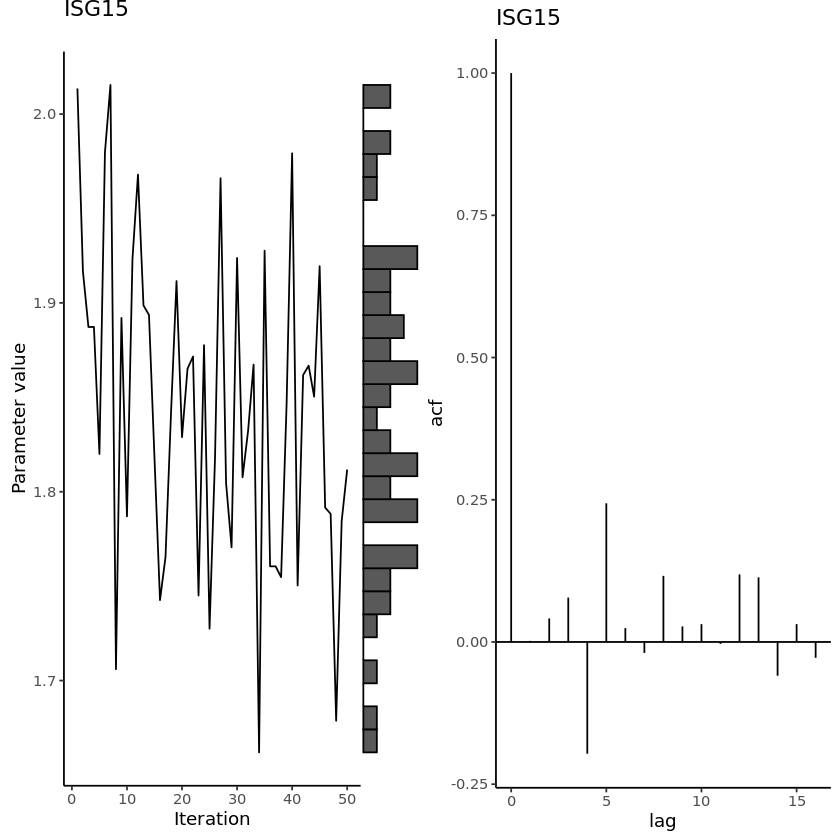

In [227]:
plot(ChainCtrl, Param = "mu", Gene = 1, log = "y")

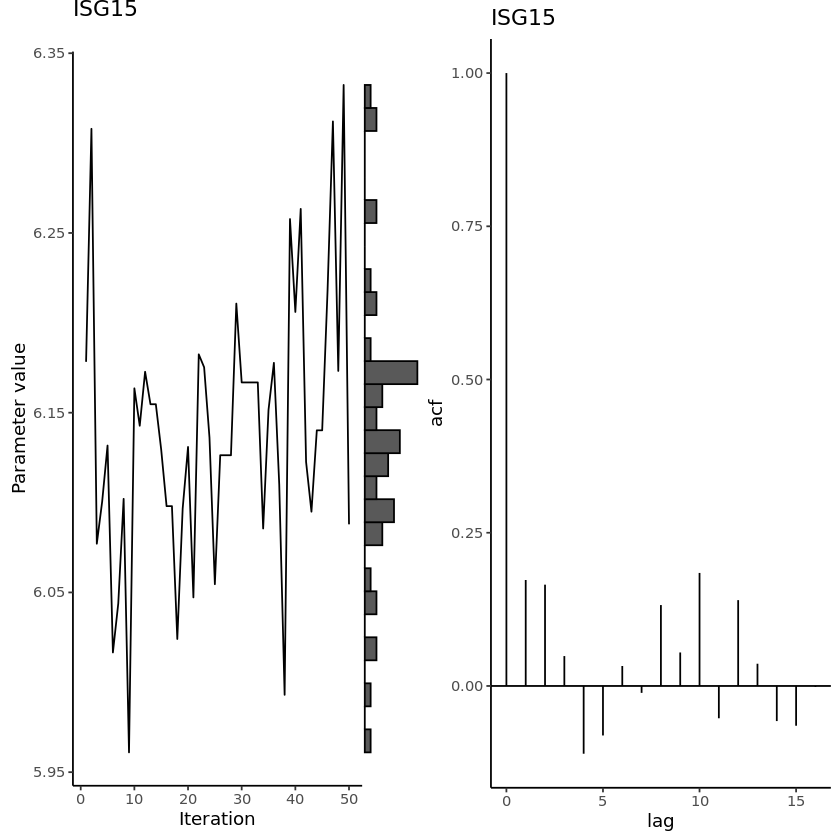

In [198]:
plot(ChainCtrltim, Param = "mu", Gene = 1, log = "y")

In [78]:
save.image(file = 'BASiCS_working.RData')

In [237]:
Test <- BASiCS_TestDE(
  Chain1 = ChainCtrl, Chain2 = ChainStim,
  GroupLabel1 = "IMMUNE_CTRL", GroupLabel2 = "IMMUNE_STIM",
  EpsilonM = log2(1), EpsilonD = log2(1),
  EFDR_M = 0.10, EFDR_D = 0.10,
  Offset = TRUE, PlotOffset = TRUE, Plot = TRUE
)

-------------------------------------------------------------
Log-fold change thresholds are now set in a log2 scale. 
Original BASiCS release used a natural logarithm scale.

-------------------------------------------------------------
Offset estimate: 0.2597
(ratio IMMUNE_CTRL vs IMMUNE_STIM).
-------------------------------------------------------------


EFDR calibration failed for Differential mean task. 
Probability threshold automatically set equal to 'ProbThresholdM'.

EFDR calibration failed for Differential dispersion task. 
Probability threshold automatically set equal to 'ProbThresholdD'.

EFDR calibration failed for Differential residual dispersion task. 
Probability threshold automatically set equal to 'ProbThresholdR'.



In [238]:
Test

An object of class BASiCS_ResultsDE, containing:
-------------------------------------------------------------
  An object of class BASiCS_ResultDE.
-------------------------------------------------------------
 0 genes with a change in mean expression 
 - Higher mean expression in IMMUNE_CTRL samples: 0 
 - Higher mean expression in IMMUNE_STIM samples: 0 
 - Fold change tolerance = 100 % 
 - Probability threshold = 0.666666666666667 
 - EFDR = NA % 
 - EFNR = NA % 
-------------------------------------------------------------
  An object of class BASiCS_ResultDE.
-------------------------------------------------------------
 0 genes with a change in over dispersion 
 - Higher over dispersion in IMMUNE_CTRL samples: 0 
 - Higher over dispersion in IMMUNE_STIM samples: 0 
 - Fold change tolerance = 100 % 
 - Probability threshold = 0.666666666666667 
 - EFDR = NA % 
 - EFNR = NA % 
-------------------------------------------------------------
  An object of class BASiCS_ResultDE.
-----

In [230]:
head(as.data.frame(Test, Parameter = "Mean"))

GeneName,MeanOverall,Mean1,Mean2,MeanFC,MeanLog2FC,ProbDiffMean,ResultDiffMean
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>


In [232]:
rowData(Test)

DataFrame with 5 rows and 1 column
     GeneName
  <character>
1       ISG15
2         MX1
3        OASL
4        OAS1
5         MX2

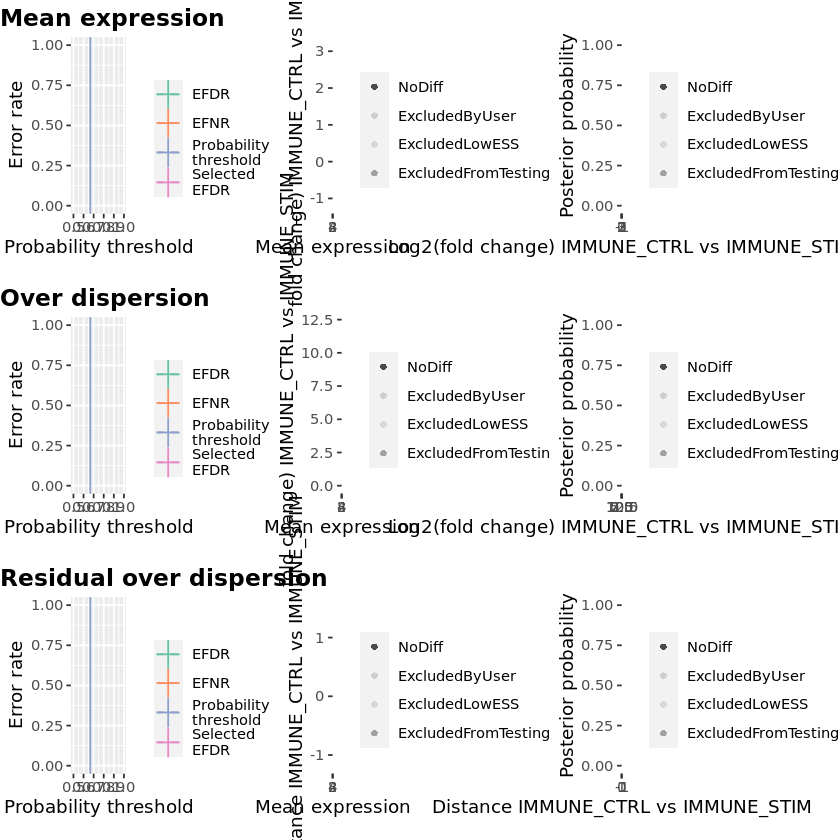

In [233]:
BASiCS_PlotDE(Test)

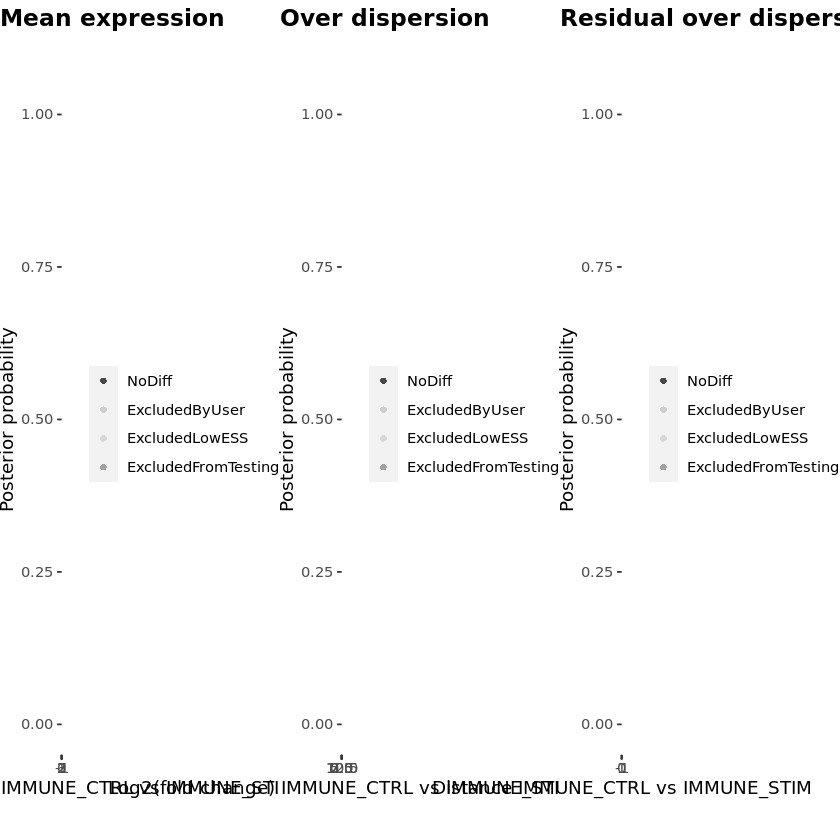

In [236]:
BASiCS_PlotDE(Test, Plots = c("Volcano"))

In [42]:
# MAST example 

In [114]:
data(maits, package='MAST')

In [115]:
scaRaw <- FromMatrix(t(maits$expressionmat), maits$cdat, maits$fdat)

Assuming data assay in position 1, with name et is log-transformed.



In [147]:
scaRaw$nGeneOn

[1]  8805  9184  8895  8000  9453 11048  8480  8958  9449 10838  9322  9286
[13]  8934  5933  5320  8798  8690  7574  6701  7487  8694  7763  8864 11812
[25]  8920  2664  7336  7803  8684  3347  9311  8289  9167  8829  8802  8856
[37]  9486 11017  8357  8768  8205  9120  8810  8978  7618  3018  7563  8281
[49]  6048  4479  2016  7041  7452  6684  6477  7867  5521  3300  6258  6829
[61]  1514  7414  7143  1434  1554  6179  5215  6793  6201  1648  1627  5896
[73]  6186  6050  1877  7318  6093  7348  7174  7447  6804  7235  7151  1813
[85]  2068  5482  1991  6579  7247  2368  6531  7360  7534  7480  6326  7336

In [ ]:
# Getting IFNB data in proper format 

In [121]:
transCount <- function(x) {
    log2(x+1)
}

In [122]:
test <- apply(rna, 1, function(x) log2(x+1))

In [123]:
test <- t(test)

In [124]:
dim(test)

[1] 14053 13999

In [125]:
dim(ifnb)

[1] 14053 13999

In [126]:
scaIFN <- FromMatrix(test, ifnb[[]])

`cData` has no wellKey.  I'll make something up.

Assuming data assay in position 1, with name et is log-transformed.



In [148]:
# DE MAST

In [150]:
scaIFN$stim

[1] "CTRL" "CTRL" "CTRL" "CTRL" "CTRL" "CTRL" "CTRL" "CTRL" "CTRL" "CTRL"
   [11] "CTRL" "CTRL" "CTRL" "CTRL" "CTRL" "CTRL" "CTRL" "CTRL" "CTRL" "CTRL"
   [21] "CTRL" "CTRL" "CTRL" "CTRL" "CTRL" "CTRL" "CTRL" "CTRL" "CTRL" "CTRL"
   [31] "CTRL" "CTRL" "CTRL" "CTRL" "CTRL" "CTRL" "CTRL" "CTRL" "CTRL" "CTRL"
   [41] "CTRL" "CTRL" "CTRL" "CTRL" "CTRL" "CTRL" "CTRL" "CTRL" "CTRL" "CTRL"
   [51] "CTRL" "CTRL" "CTRL" "CTRL" "CTRL" "CTRL" "CTRL" "CTRL" "CTRL" "CTRL"
   [61] "CTRL" "CTRL" "CTRL" "CTRL" "CTRL" "CTRL" "CTRL" "CTRL" "CTRL" "CTRL"
   [71] "CTRL" "CTRL" "CTRL" "CTRL" "CTRL" "CTRL" "CTRL" "CTRL" "CTRL" "CTRL"
   [81] "CTRL" "CTRL" "CTRL" "CTRL" "CTRL" "CTRL" "CTRL" "CTRL" "CTRL" "CTRL"
   [91] "CTRL" "CTRL" "CTRL" "CTRL" "CTRL" "CTRL" "CTRL" "CTRL" "CTRL" "CTRL"
  [101] "CTRL" "CTRL" "CTRL" "CTRL" "CTRL" "CTRL" "CTRL" "CTRL" "CTRL" "CTRL"
  [111] "CTRL" "CTRL" "CTRL" "CTRL" "CTRL" "CTRL" "CTRL" "CTRL" "CTRL" "CTRL"
  [121] "CTRL" "CTRL" "CTRL" "CTRL" "CTRL" "CTRL" "CTRL" "CTRL" "CTRL" "CTRL"
  [131] "CTRL" "CTRL" "CTRL" "CTRL" "CTRL" "CTRL" "CTRL" "CTRL" "CTRL" "CTRL"
  [141] "CTRL" "CTRL" "CTRL" "CTRL" "CTRL" "CTRL" "CTRL" "CTRL" "CTRL" "CTRL"
  [151] "CTRL" "CTRL" "CTRL" "CTRL" "CTRL" "CTRL" "CTRL" "CTRL" "CTRL" "CTRL"
  [161] "CTRL" "CTRL" "CTRL" "CTRL" "CTRL" "CTRL" "CTRL" "CTRL" "CTRL" "CTRL"
  [171] "CTRL" "CTRL" "CTRL" "CTRL" "CTRL" "CTRL" "CTRL" "CTRL" "CTRL" "CTRL"
  [181] "CTRL" "CTRL" "CTRL" "CTRL" "CTRL" "CTRL" "CTRL" "CTRL" "CTRL" "CTRL"
  [191] "CTRL" "CTRL" "CTRL" "CTRL" "CTRL" "CTRL" "CTRL" "CTRL" "CTRL" "CTRL"
  [201] "CTRL" "CTRL" "CTRL" "CTRL" "CTRL" "CTRL" "CTRL" "CTRL" "CTRL" "CTRL"
  [211] "CTRL" "CTRL" "CTRL" "CTRL" "CTRL" "CTRL" "CTRL" "CTRL" "CTRL" "CTRL"
  [221] "CTRL" "CTRL" "CTRL" "CTRL" "CTRL" "CTRL" "CTRL" "CTRL" "CTRL" "CTRL"
  [231] "CTRL" "CTRL" "CTRL" "CTRL" "CTRL" "CTRL" "CTRL" "CTRL" "CTRL" "CTRL"
  [241] "CTRL" "CTRL" "CTRL" "CTRL" "CTRL" "CTRL" "CTRL" "CTRL" "CTRL" "CTRL"
  [251] "CTRL" "CTRL" "CTRL" "CTRL" "CTRL" "CTRL" "CTRL" "CTRL" "CTRL" "CTRL"
  [261] "CTRL" "CTRL" "CTRL" "CTRL" "CTRL" "CTRL" "CTRL" "CTRL" "CTRL" "CTRL"
  [271] "CTRL" "CTRL" "CTRL" "CTRL" "CTRL" "CTRL" "CTRL" "CTRL" "CTRL" "CTRL"
  [281] "CTRL" "CTRL" "CTRL" "CTRL" "CTRL" "CTRL" "CTRL" "CTRL" "CTRL" "CTRL"
  [291] "CTRL" "CTRL" "CTRL" "CTRL" "CTRL" "CTRL" "CTRL" "CTRL" "CTRL" "CTRL"
  [301] "CTRL" "CTRL" "CTRL" "CTRL" "CTRL" "CTRL" "CTRL" "CTRL" "CTRL" "CTRL"
  [311] "CTRL" "CTRL" "CTRL" "CTRL" "CTRL" "CTRL" "CTRL" "CTRL" "CTRL" "CTRL"
  [321] "CTRL" "CTRL" "CTRL" "CTRL" "CTRL" "CTRL" "CTRL" "CTRL" "CTRL" "CTRL"
  [331] "CTRL" "CTRL" "CTRL" "CTRL" "CTRL" "CTRL" "CTRL" "CTRL" "CTRL" "CTRL"
  [341] "CTRL" "CTRL" "CTRL" "CTRL" "CTRL" "CTRL" "CTRL" "CTRL" "CTRL" "CTRL"
  [351] "CTRL" "CTRL" "CTRL" "CTRL" "CTRL" "CTRL" "CTRL" "CTRL" "CTRL" "CTRL"
  [361] "CTRL" "CTRL" "CTRL" "CTRL" "CTRL" "CTRL" "CTRL" "CTRL" "CTRL" "CTRL"
  [371] "CTRL" "CTRL" "CTRL" "CTRL" "CTRL" "CTRL" "CTRL" "CTRL" "CTRL" "CTRL"
  [381] "CTRL" "CTRL" "CTRL" "CTRL" "CTRL" "CTRL" "CTRL" "CTRL" "CTRL" "CTRL"
  [391] "CTRL" "CTRL" "CTRL" "CTRL" "CTRL" "CTRL" "CTRL" "CTRL" "CTRL" "CTRL"
  [401] "CTRL" "CTRL" "CTRL" "CTRL" "CTRL" "CTRL" "CTRL" "CTRL" "CTRL" "CTRL"
  [411] "CTRL" "CTRL" "CTRL" "CTRL" "CTRL" "CTRL" "CTRL" "CTRL" "CTRL" "CTRL"
  [421] "CTRL" "CTRL" "CTRL" "CTRL" "CTRL" "CTRL" "CTRL" "CTRL" "CTRL" "CTRL"
  [431] "CTRL" "CTRL" "CTRL" "CTRL" "CTRL" "CTRL" "CTRL" "CTRL" "CTRL" "CTRL"
  [441] "CTRL" "CTRL" "CTRL" "CTRL" "CTRL" "CTRL" "CTRL" "CTRL" "CTRL" "CTRL"
  [451] "CTRL" "CTRL" "CTRL" "CTRL" "CTRL" "CTRL" "CTRL" "CTRL" "CTRL" "CTRL"
  [461] "CTRL" "CTRL" "CTRL" "CTRL" "CTRL" "CTRL" "CTRL" "CTRL" "CTRL" "CTRL"
  [471] "CTRL" "CTRL" "CTRL" "CTRL" "CTRL" "CTRL" "CTRL" "CTRL" "CTRL" "CTRL"
  [481] "CTRL" "CTRL" "CTRL" "CTRL" "CTRL" "CTRL" "CTRL" "CTRL" "CTRL" "CTRL"
  [491] "CTRL" "CTRL" "CTRL" "CTRL" "CTRL" "CTRL" "CTRL" "CTRL" "CTRL" "CTRL"
  [501] "CTRL" "CTRL" "CTRL" "CTRL" "CTRL" "CTRL" "CTRL" "CTRL" "CTRL" "CTRL"
  [511] "CTRL" "CTRL" "CTR

In [151]:
zlmCond <- zlm(~stim, scaIFN)


 Completed [--------------------------------------------]   0% with 0 failures

 Completed [--------------------------------------------]   1% with 0 failures

 Completed [>-------------------------------------------]   1% with 0 failures

 Completed [>-------------------------------------------]   2% with 0 failures

 Completed [>-------------------------------------------]   3% with 0 failures

 Completed [=>------------------------------------------]   3% with 0 failures

 Completed [=>------------------------------------------]   4% with 0 failures

 Completed [=>------------------------------------------]   5% with 0 failures

 Completed [=>------------------------------------------]   6% with 0 failures

 Completed [==>-----------------------------------------]   6% with 0 failures

 Completed [==>-----------------------------------------]   7% with 0 failures

 Completed [==>-----------------------------------------]   8% with 0 failures

 Completed [===>-----------------------